# More clustering algorithms

- Agglomerative(Hierarchical Clustering) <br>
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

In [1]:
!pip install nltk

In [2]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import scipy.cluster.hierarchy as sch
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import numpy as np
from collections import Counter 
import gensim
# import nltk
# nltk.download('punkt')
# from konlpy.tag import Mecab

In [5]:
root_path = '/content/drive/My Drive/Colab Notebooks/2020-PoscoICT/Data/'

In [6]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [7]:
df = pd.read_csv(root_path+'nsmc/ratings_train.txt', sep='\t')

In [8]:
df = df.dropna(axis=0)
df = df.head(500)

# create embeddings

In [22]:
def w2v_predict(model, embedding_size, tokenized_words):
    # words = sentence.split()
    feature_vec = np.zeros((embedding_size,), dtype='float32')
    n_words = 0
    index2word_set = set(model.wv.index2word)
    for word in tokenized_words:
        if word in index2word_set:
            n_words += 1
            feature_vec = np.add(feature_vec, model[word])
    if (n_words > 0):
        feature_vec = np.divide(feature_vec, n_words)
    return feature_vec

In [23]:
# mecab = Mecab()
# df['tokenized_sents'] = [' '.join(mecab.morphs(x)) for x in df['document']]
model = gensim.models.Word2Vec.load(root_path+'ko/ko.bin')

In [24]:
df['tokenized_sents'] = [' '.join(nltk.word_tokenize(x)) for x in df['document']]

In [25]:
df['embedding'] = [w2v_predict(model, 200, x) for x in df['tokenized_sents']] 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


# Not specifying # of clusters. 
- Use difference in distances as a clustering criteria

### Apply AgglomerativeClustering algorithm from scikitlearn : 3 clusters

In [26]:
X = df.embedding.values
X = np.array(X, dtype=object)
X = np.array([x.tolist() for x in X], dtype=object)
clustering = AgglomerativeClustering(affinity='euclidean', n_clusters = 3, distance_threshold = None).fit(X)

# # may cause errors
# clustering = AgglomerativeClustering(affinity='cosine', n_clusters = None, linkage = 'complete', distance_threshold = 0.45).fit(X)

print(clustering.labels_)

[1 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 1
 0 0 0 0 0 1 0 1 1 1 0 0 1 1 1 1 1 1 1 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1
 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 1 1 1 1 0 0 0 1 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 1 0 0 0 0 1 0 0 1 1 1 0 0
 0 0 0 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 1 1 0 1 0 0 1 0 0 1 1 1 0 1
 2 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0
 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 1 1 0 1 1 1 0 0
 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 1 0 0 1
 1 0 1 1 1 0 1 0 0 1 0 1 1 0 1 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 0 1 0 1 0 0 0 1 0 1
 1 1 1 0 1 1 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 1 1 0 1 1 0 0 0 0 1 0 1 0 0 0 1
 0 0 1 0 0 0 1 0 1 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 1 0 0 1 

In [27]:
print(clustering.n_clusters_)

3


In [28]:
clustering_labels = clustering.labels_

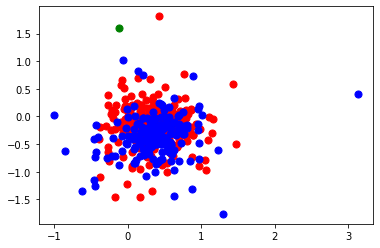

In [29]:
plt.scatter(X[clustering_labels==0, 0], X[clustering_labels==0, 1], s=50, marker='o', color='red')
plt.scatter(X[clustering_labels==1, 0], X[clustering_labels==1, 1], s=50, marker='o', color='blue')
plt.scatter(X[clustering_labels==2, 0], X[clustering_labels==2, 1], s=50, marker='o', color='green')
plt.scatter(X[clustering_labels==3, 0], X[clustering_labels==3, 1], s=50, marker='o', color='purple')
plt.scatter(X[clustering_labels==4, 0], X[clustering_labels==4, 1], s=50, marker='o', color='orange')
plt.show()

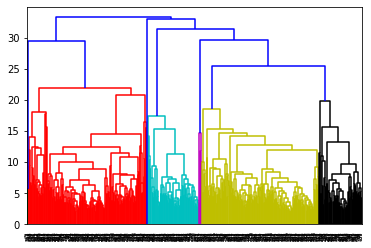

In [30]:
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
# the longest vertical distance without any horizontal line passing
# this shows that the optimal number of clusters is 2 

In [31]:
df['cluster_label'] = clustering_labels

In [32]:
df.cluster_label

0      1
1      0
2      0
3      0
4      1
      ..
495    0
496    0
497    1
498    0
499    0
Name: cluster_label, Length: 500, dtype: int64

In [34]:
cluster_0 = df.loc[df['cluster_label'] == 0]
cluster_1 = df.loc[df['cluster_label'] == 1]
cluster_2 = df.loc[df['cluster_label'] == 2]
# cluster_3 = df.loc[df['cluster_label'] == 3]
# cluster_4 = df.loc[df['cluster_label'] == 4]
# cluster_5 = df.loc[df['cluster_label'] == 5]
# cluster_6 = df.loc[df['cluster_label'] == 6]
# cluster_7 = df.loc[df['cluster_label'] == 7]
# cluster_8 = df.loc[df['cluster_label'] == 8]
# cluster_9 = df.loc[df['cluster_label'] == 9]

In [35]:
df.groupby('label')['tokenized_sents'].nunique()

label
0    242
1    258
Name: tokenized_sents, dtype: int64

In [36]:
cluster_0.groupby('label')['tokenized_sents'].nunique()

label
0    169
1    151
Name: tokenized_sents, dtype: int64

In [37]:
cluster_1.groupby('label')['tokenized_sents'].nunique()

label
0     72
1    107
Name: tokenized_sents, dtype: int64

In [38]:
cluster_2.groupby('label')['tokenized_sents'].nunique()

label
0    1
Name: tokenized_sents, dtype: int64

In [39]:
def get_sentences_into_list(cluster): 
    sentences_0 = []
    for index, row in cluster.iterrows(): 
        sentences_0.append(row['tokenized_sents'])
    return sentences_0

In [40]:
cluster_0_sentences = get_sentences_into_list(cluster_0)
cluster_1_sentences = get_sentences_into_list(cluster_1)
cluster_2_sentences = get_sentences_into_list(cluster_2)

In [41]:
def get_most_frequent_words(data_set):
    # split() returns list of all the words in the string
    data_set = data_set.lower()
    split_it = data_set.split() 
    # remove stopwords
    filtered_sentence = [w for w in split_it if not w in stopwords] 
    # Pass the split_it list to instance of Counter class. 
    counter = Counter(filtered_sentence) 
    # most_common() produces k frequently encountered 
    # input values and their respective counts. 
    most_occur = counter.most_common(13) 
    return most_occur

In [42]:
get_most_frequent_words(''.join(cluster_1_sentences))

[('!', 50),
 (',', 33),
 ('.', 31),
 ('...', 18),
 ('영화', 15),
 ('정말', 12),
 ('?', 11),
 ('너무', 11),
 ('진짜', 9),
 ('더', 6),
 ('스토리도', 5),
 ('완전', 5),
 ('그', 5)]

# Another Experiment 2

In [43]:
X = df.embedding.values
X = np.array(X, dtype=object)
X = np.array([x.tolist() for x in X],dtype=object)
clustering = AgglomerativeClustering(affinity='euclidean', n_clusters = None, distance_threshold = 32).fit(X)
# clustering = AgglomerativeClustering(affinity='cosine', n_clusters = None, linkage = 'complete', distance_threshold = 0.45).fit(X)

clustering.labels_

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,

In [ ]:
print(clustering.n_clusters_)

In [ ]:
clustering_labels = clustering.labels_

In [ ]:
plt.scatter(X[clustering_labels==0, 0], X[clustering_labels==0, 1], s=50, marker='o', color='red')
plt.scatter(X[clustering_labels==1, 0], X[clustering_labels==1, 1], s=50, marker='o', color='blue')
plt.scatter(X[clustering_labels==2, 0], X[clustering_labels==2, 1], s=50, marker='o', color='green')
plt.scatter(X[clustering_labels==3, 0], X[clustering_labels==3, 1], s=50, marker='o', color='purple')
# plt.scatter(X[clustering_labels==4, 0], X[clustering_labels==4, 1], s=50, marker='o', color='orange')
plt.show()

In [ ]:
df['cluster_label'] = clustering_labels

In [ ]:
df.cluster_label.unique()

In [ ]:
cluster_0 = df.loc[df['cluster_label'] == 0]
cluster_1 = df.loc[df['cluster_label'] == 1]
cluster_2 = df.loc[df['cluster_label'] == 2]
cluster_3 = df.loc[df['cluster_label'] == 3]

In [ ]:
cluster_0.groupby('label')['tokenized_sents'].nunique()

In [ ]:
cluster_1.groupby('label')['tokenized_sents'].nunique()

In [ ]:
cluster_2.groupby('label')['tokenized_sents'].nunique()

# top words per cluster

In [ ]:
cluster_0_sentences = get_sentences_into_list(cluster_0)
cluster_1_sentences = get_sentences_into_list(cluster_1)
cluster_2_sentences = get_sentences_into_list(cluster_2)

In [ ]:
most_occur_0 = get_most_frequent_words(''.join(cluster_0_sentences))
most_occur_1 = get_most_frequent_words(''.join(cluster_1_sentences))
most_occur_2 = get_most_frequent_words(''.join(cluster_2_sentences))

In [ ]:
most_occur_0

In [ ]:
most_occur_1

In [ ]:
most_occur_2